### Pre-Processing

In [ ]:
fldr1='drive/My Drive/image captioning/Flicker8k_Dataset'

In [ ]:
import os

In [ ]:
files=os.listdir(fldr1)

#### Image Preprocessing

In [ ]:
import cv2

In [ ]:
images=[]
name=[]

In [ ]:
## Recording the images and the corresonding filenames as they are the only way to match
## the images with their descriptions

count=0
for file in files:
    name.append(file)
    print(count)
    count+=1
    image=cv2.imread(fldr1+'/'+file)
    #print(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    images.append(image)
    

In [14]:
import numpy as np

In [ ]:
name_np=np.array(name)

In [ ]:
images_np=np.array(images)

In [ ]:
np.save('drive/My Drive/image captioning/Images_record.npy',images_np)

In [ ]:
np.save('drive/My Drive/image captioning/Name_record.npy',name_np)

In [13]:
import pickle

In [17]:
open_file = open('drive/My Drive/image captioning/Name_rec.pkl' , "wb")
pickle.dump(name, open_file)
open_file.close()

In [15]:
images=np.load('drive/My Drive/image captioning/Images_record.npy')

In [16]:
names=np.load('drive/My Drive/image captioning/Name_record.npy')

In [ ]:
names

In [18]:
len(images)

8091

In [19]:
len(names)

8091

#### Language data Preprocessing

In [21]:
import pandas as pd


In [22]:
df=pd.read_csv("drive/My Drive/image captioning/desc.csv")

In [ ]:
df.head()

In [24]:
import re

In [25]:
## Applying Preprocessing to the language
## Removing any character which is not alphabet and whose length is not greater than 1
## Converting all words to lower case

def preprocess(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    words=text.split()
    words_sm=[word.lower() for word in words]

    words_la=[word for word in words_sm if len(word)>1]

    words_f=[word for word in words_la if word.isalpha()]

    text=""

    for word in words_f:
      text=text+word+" "

    return text

In [26]:
df['description']=df['description'].apply(preprocess)

In [ ]:
df.head(20)

In [28]:
mapping={}

In [ ]:
## Creating a dictionary which has the image file name as key
## The dictionary has the corresponding descriptions of the files
## And the corresponding images as numpy arrays.

In [29]:
i=0
while i<len(df):
  if df.iloc[i]['image'] in mapping.keys():
    mapping[df.iloc[i]['image']]['desc'].append(df.iloc[i]['description'])
  else:
    mapping[df.iloc[i]['image']]={}
    mapping[df.iloc[i]['image']]['desc']=[df.iloc[i]['description']]
    
  i+=1


In [ ]:
mapping

In [31]:
name_l=list(names)

In [ ]:
name_l

In [ ]:
keys=[key for key in mapping.keys()]
for key in keys:
  try:
    print(key)
    ind=name_l.index(key)
    mapping[key]['image']=images[ind]
  except:
    mapping.pop(key,None)

In [ ]:
mapping

In [35]:
X=[]
y=[]

  

In [36]:
for k in mapping.keys():
  X.append(mapping[k]['image'])
  y.append(mapping[k]['desc'])

In [ ]:
y

In [43]:
X_f=np.array(X)

In [42]:
y_f=np.array(y)

In [26]:
np.save('drive/My Drive/image captioning/X_f.npy',X_f)
np.save('drive/My Drive/image captioning/y_f.npy',y_f)

In [38]:
import numpy as np


In [3]:
X_f=np.load('drive/My Drive/image captioning/X_f.npy')

In [44]:
len(X_f)

8091

In [8]:
X_f=list(X_f)

In [ ]:
y_f=np.load('drive/My Drive/image captioning/y_f.npy')

### Creating Tokenizer, a dictionary named 'Word_map"

In [1]:
### Word map is a dictionary with the word as the key and the corresponding Representing 
### integer and the count of its occurence in the whole dataset

In [46]:
word_map={}
count=1

In [ ]:
y_f

In [ ]:
for description_grps in y_f:
  for descriptions in description_grps:
    words=descriptions.split()
    for word in words:
      print(word)
      
      if word in word_map.keys():
        word_map[word]['count']=word_map[word]['count']+1
        
      else:
        word_map[word]={}
        word_map[word]['Rep']=count
        word_map[word]['count']=1
        count+=1

      


In [ ]:
word_map

In [50]:
import json 

In [51]:
out_file = open("drive/My Drive/image captioning/word_map.json", "w")

In [52]:
json.dump(word_map,out_file)

In [54]:
out_file = open("word_map.json", "w")

In [55]:
json.dump(word_map,out_file)

In [8]:
out_file = open("drive/My Drive/image captioning/word_map.json", "r")

In [ ]:
word_map=json.load(out_file)

In [57]:
len(word_map)

9385

In [2]:
## After prepeocessing we have 9385 unique words in our entire dataset

In [56]:
out_file.close()

In [3]:
### Tokenizing the dataset. 

### Replacing the words with their corresponding represention according to the word_map

In [58]:
Y=[]

In [59]:
final_length=25

In [60]:
for description_grps in y_f:

  Y_temp=[]
  for descriptions in description_grps:  
    words=descriptions.split()
    temp_sent=[]
    for word in words:
      temp_sent.append(word_map[word]['Rep'])
    Y_temp.append(temp_sent)
  Y.append(Y_temp)


In [61]:
Y_n=np.array(Y)

In [62]:
len(Y)

8091

In [41]:
np.save("drive/My Drive/image captioning/Y_final.npy",Y_n)

In [4]:
Y_n=np.load("drive/My Drive/image captioning/Y_final.npy",allow_pickle=True)

In [42]:
len(Y_n)

8091

In [17]:
y_f=list(y_f)

In [3]:
X_f_2=X_f/255

In [4]:
np.save('X_f_2.npy',X_f_2)

In [4]:
import numpy as np


In [63]:
from sklearn.model_selection import train_test_split

In [4]:
### Splitting the data

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X_f,Y_n, test_size=0.2)

In [5]:
### Creating embedding matrix for the word vectors

In [8]:
emb_dim=50
vocab=len(word_map)+1
#len(word_map)=9385
emb_mat= np.zeros((vocab,emb_dim))

In [7]:
file_path="drive/My Drive/glove.6B/"

In [ ]:
### For embedding I have used Glove6B by the standford NLP

In [67]:
with open(file_path+'glove.6B.50d.txt') as f:
        for line in f:
          word, *emb = line.split()
          if word in word_map.keys():
            emb_mat[word_map[word]['Rep']]=np.array(emb,dtype="float32")[:emb_dim]


In [ ]:
### The above code picks up every word in the dataset and picks its 50d embedding from the glove 6b. 
### So, as we have 9385 words our embedding will have a dimension of 9385x50

In [68]:
from tensorflow.keras.layers import Embedding,Dense, Activation, MaxPool1D,Input, LSTM, Dropout, Input,Activation,add,MaxPooling2D,Conv2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

### Modelling

In [69]:
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.003))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

def model(input_shape):
  inputs_images=Input((input_shape))
  conv_1= Convolution(inputs_images,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  flatten= Flatten() (maxp_3)
  dense_1= Dense(256,activation='relu')(flatten)

  inputs_language=Input(shape=(final_length,))
  emb1=Embedding(input_dim=vocab, output_dim=emb_dim,weights=[emb_mat],trainable=False)(inputs_language)
  dr1=Dropout(0.2)(emb1)
  lstm1=LSTM(128,return_sequences=True)(dr1)
  dr2=Dropout(0.2)(lstm1)
  lstm2=LSTM(256,return_sequences=True)(dr2)

  out_1=add([dense_1,lstm2])
  out_2=Dense(256,activation='relu')(out_1)
  output=Dense(vocab,activation='softmax')(out_2)


  mdl= Model(inputs=[inputs_images,inputs_language],outputs=[output])
  mdl.summary()
  
  mdl.compile(loss="categorical_crossentropy", optimizer="Adam")

  return mdl


  


In [70]:
Model=model(input_shape = (224,224,3))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 224, 224, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 224, 224, 32) 0           dropout[0][0]                    
_______________________________________________________________________________________

In [71]:
Model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 224, 224, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 224, 224, 32) 0           dropout[0][0]                    
_______________________________________________________________________________________

In [72]:
from keras.utils.vis_utils import plot_model

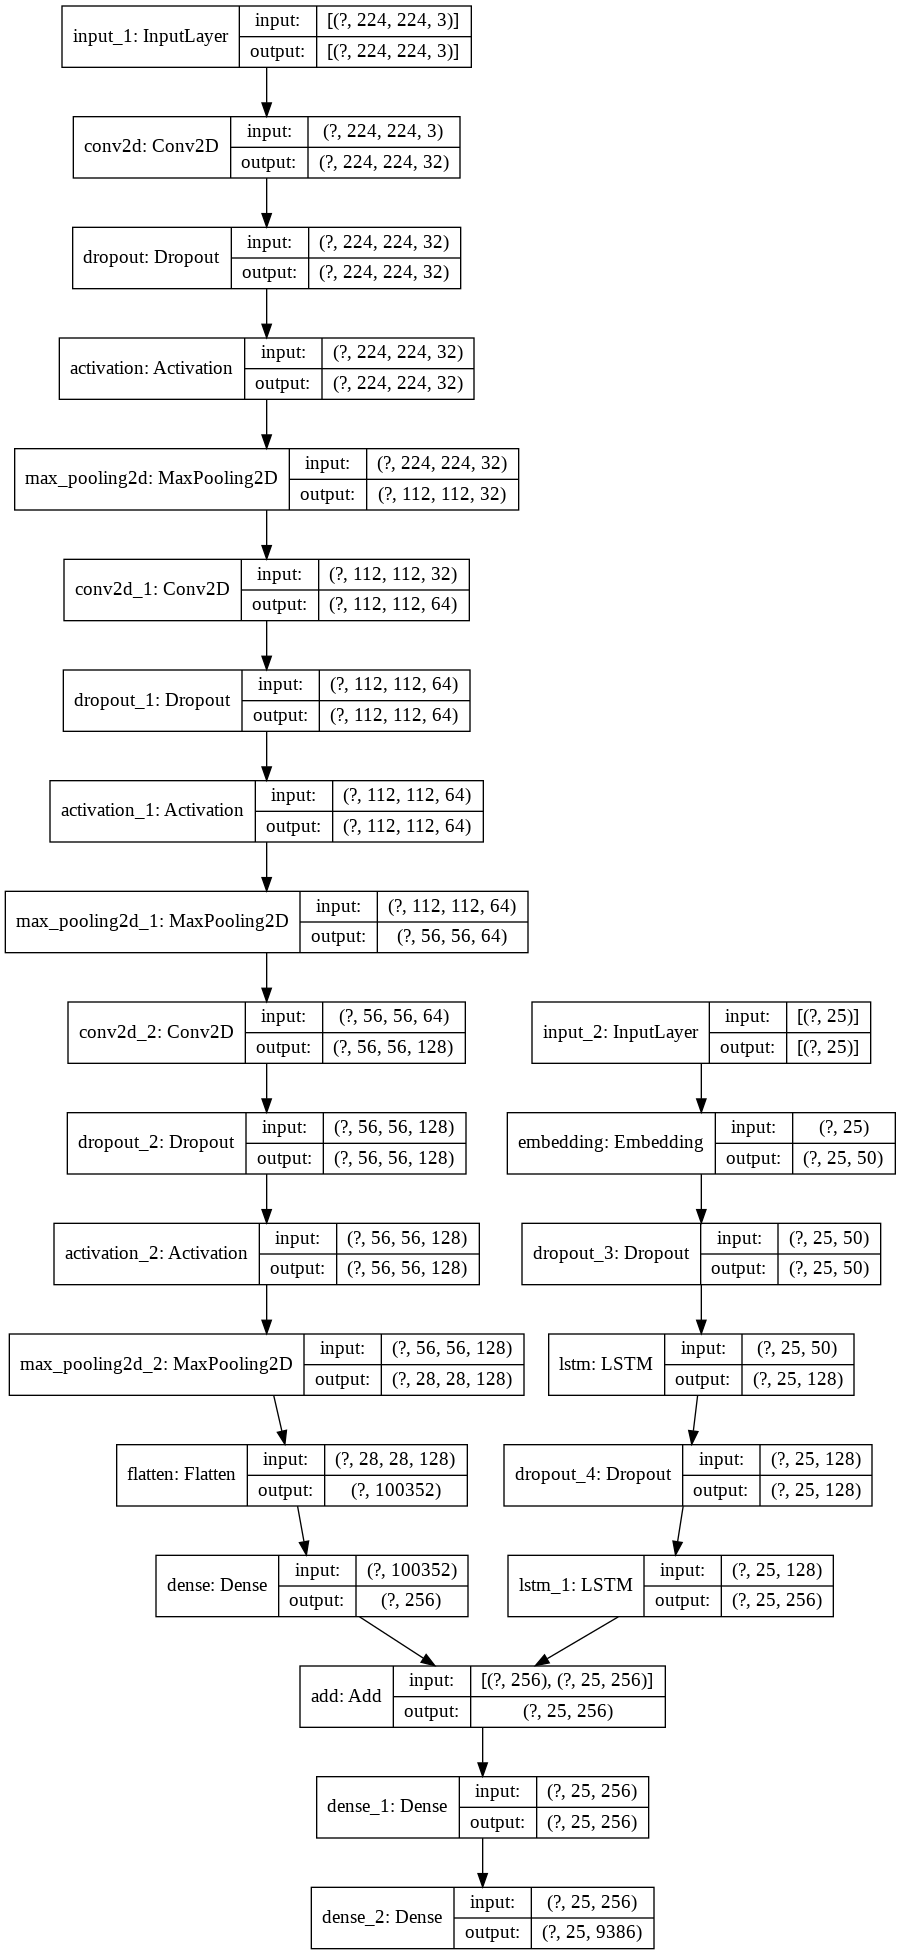

In [73]:
plot_model(Model, to_file='drive/My Drive/image captioning/model_plot.png', show_shapes=True, show_layer_names=True)

In [146]:
Y_train

array([array([[   0,   26,   28,   39,   27,    5,  243,    2,  240,   14,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,   26,   28,   39,   27,    5,  243,    2,   62,  126,  240,
          14,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,   27,  243,    2,  255,   14,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,   27, 2180,  122,  572,  126,  141,   14,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,   22,   26,   28,   39,   27,    5,  243,    2,   22,  439,
          14,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]]),
       array([[   0, 1391, 1282,    5,  235,   23, 4516,  186,  144,   14,    0,
           0,    0,    0,    0,    

In [74]:
np.save('drive/My Drive/image captioning/X_train_final.npy',X_train)
np.save('drive/My Drive/image captioning/Y_train_final.npy',Y_train)

In [1]:
import numpy as np


In [5]:
X_train=np.load('drive/My Drive/image captioning/X_train_final.npy')
Y_train=np.load('drive/My Drive/image captioning/Y_train_final.npy', allow_pickle=True)

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [6]:
### The below code is like a data generator for training the model
### So, at each step the Input will be the image and the sequence of words till time step t-1 
### In order to predict the word at timestep t, so it will be the output.
### So, basically here our dataset becomes huge. 

### If a description says "startseq A boy playing on the ground endseq"
### At time stamp t=0, the input will be "startseq" output will be "A"
### At time stamp t=1, the input will be "startseq A" output will be "boy" and so on.

### But the input must be of the fixed input length. In this case, I have used 15. 
### SO, we make the length of the input equal to 15 using 0 as padding 
### Now, say "boy" is represented by 2. So, it represented similar to a multiclass classification with 9385 classes
### So, we need to send the encoding of 2 as the output

In [6]:
def get_data_trainer(X_train,Y_train):
  image_inp=[]
  text_inp=[]
  text_oup=[]
  for i in range(len(X_train)):
    if i==3000:
      break
    #print(i)
    for j in range(len(Y_train[i])):

      #print(j)
      for z in range(1,len(Y_train[i][j])):

        raw_in,raw_out= Y_train[i][j][:z],Y_train[i][j][z]
        #print(raw_out)
        length=15
        text_in=pad_sequences([raw_in],maxlen=length)[0]
        text_out=to_categorical([raw_out],num_classes=vocab)[0]

        text_inp.append(text_in)
        text_oup.append(text_out)
        image_inp.append(X_train[i])

  return np.array(text_inp), np.array(text_oup), np.array(image_inp)




      





In [ ]:
X_text_inp,X_text_oup,X_image_inp=get_data_trainer(X_train,Y_train)

In [ ]:
history = Model.fit([X_text_inp,X_text_oup], Y_train,epochs=10,verbose=True,batch_size=32)

In [7]:
### The below code produces the output

### The get_word takes in the integer produced and returns the word according to the word_map
### Generate_Results returns the word index predicted by the model. We use softmax regressions so, we pick the word index with
### Max probability using Argmax. The model as input takes the image and the sequence produced until that timestep.
### If the word "endseq" is produced then loop breaks.

In [ ]:
def get_word(i,word_map):
  for key,vals in word_map.items():
    if vals[0]==i:
      return key

def generate_results(model,image,length,word_map):

  text="startseq"

  for i in range(length):
    words=text.split()
    sequence=[]
    for j in words:
      sequence.append(word_map[word]['Rep'])
    sequence=pad_sequences([sequence],max_length=length)

    word_predict=model.predict([image,sequence])

    word_pr=argmax(word_predict)

    word=get_word(word_pr,word_map)

    if word is None:
      break
    
    text=text+ ' '+ word

    if word=='endseq':
      break

  return text
     
